In [1]:
from learntools import Network, Learning, VariableStructure
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [32]:
def accuracy(y_pred, y): #
    y_pred = Network.softmax().forward(y_pred)
    acc = 0
    n = len(y_pred)
    for i in range(n):
        if np.argmax(y_pred[i]) == y[i]:
            acc += 1

    return acc / n

def MSELoss(y_pred, y): # one-hot encoded
    y_pred = Network.softmax().forward(y_pred)
    loss = 0
    n = len(y_pred)
    for i in range(n):
        for j in range(10):
            if j == y[i]:
                loss += 1 - y_pred[i][j]
            else:
                loss += y_pred[i][j]

    return loss / n 


LossFunction = lambda net: MSELoss(net.forward(x),y)

# Reshaping the training and testing data
x_train_flatten = x_train.reshape(x_train.shape[0], 28*28) / 255
x_test_flatten = x_test.reshape(x_test.shape[0], 28*28) / 255

In [45]:
indices = np.random.choice(x_train_flatten.shape[0], 1_000, replace=False)
x = x_train_flatten[indices]
y = y_train[indices]

In [46]:
simpleNet = Network.network(784,10)
simpleNet.add_layer(Network.layer_dense(784,10))
simpleNet.add_layer(Network.softmax())

simpleLoss, simpleData = Learning.random_learning(simpleNet,LossFunction,info=True)

Iter 0 Loss 1.7999999999997591
Iter 1 Loss 1.7999403410169603
Iter 2 Loss 1.7987285324361224
Iter 3 Loss 1.7972251495156963
Iter 4 Loss 1.79574314216531
Iter 5 Loss 1.7954996036833595
Iter 6 Loss 1.794945136195722
Iter 7 Loss 1.7936334070589641
Iter 8 Loss 1.7932432678272925
Iter 9 Loss 1.7926058837259387
Iter 10 Loss 1.7923736499895888
Iter 11 Loss 1.7923341005277205
Iter 12 Loss 1.7921344331548739
Iter 13 Loss 1.792087928007289
Iter 14 Loss 1.7913265228698076
Iter 15 Loss 1.791123031496621
Iter 16 Loss 1.7895454381449694
Iter 17 Loss 1.788345961940635
Iter 18 Loss 1.7878751386259277
Iter 19 Loss 1.7873957087335925
Iter 20 Loss 1.7867028724412288
Iter 21 Loss 1.7857611384140202
Iter 22 Loss 1.7850922016205788
Iter 23 Loss 1.7848062734299501
Iter 24 Loss 1.7843943847090282
Iter 25 Loss 1.7840821553365118
Iter 26 Loss 1.7831307535716483
Iter 27 Loss 1.783055333951697
Iter 28 Loss 1.7822085182459633
Iter 29 Loss 1.7815041460027827
Iter 30 Loss 1.7797557409145701
Iter 31 Loss 1.7794760280

0.7166


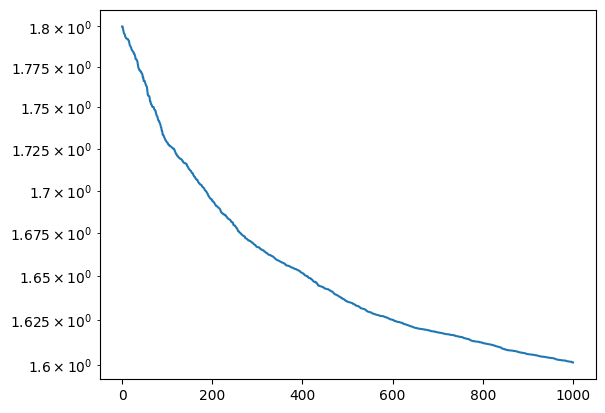

In [47]:
print(accuracy(simpleNet.forward(x_test_flatten),y_test))
plt.plot(simpleLoss)
plt.yscale('log')

In [33]:
indices = np.random.choice(x_train_flatten.shape[0], 1000, replace=False)
x = x_train_flatten[indices]
y = y_train[indices]

netMNIST, losses = VariableStructure.VariableStructure(784,10,LossFunction,Network.relu, 
                                                       epochs = 600,info = True, reset = 2, 
                                                       threshold = 0, mutation_rate=0.5,
                                                      max_its = 10)

Epoch-0-loss-1.8019652796040286
Epoch-1-loss-1.7765009016527837
Epoch-2-loss-1.7620590998908845
Epoch-3-loss-1.743522838154454
Epoch-4-loss-1.7338047296955552
Epoch-5-loss-1.7198671547051978
Epoch-6-loss-1.7083159061267923
Epoch-7-loss-1.6987153059606799
Epoch-8-loss-1.6875514106547134
Epoch-9-loss-1.6790881759854392
Epoch-10-loss-1.6721378133773954
Epoch-11-loss-1.655515983258064
Epoch-12-loss-1.6431510820300848
Epoch-13-loss-1.631487153102393
Epoch-14-loss-1.6219857648558287
Epoch-15-loss-1.6102304648017536
Epoch-16-loss-1.598502096280817
Epoch-17-loss-1.5877169980239036
Epoch-18-loss-1.572525009393492
Epoch-19-loss-1.562616950564565
Epoch-20-loss-1.5504954678383902
Epoch-21-loss-1.5363636907216438
Epoch-22-loss-1.5260187348823884
Epoch-23-loss-1.51315198898424
Epoch-24-loss-1.5013036195443594
Epoch-25-loss-1.4911976278758095
Epoch-26-loss-1.485834288175837
Epoch-27-loss-1.478356677816542
Epoch-28-loss-1.4723429309748877
Epoch-29-loss-1.464447414802545
Epoch-30-loss-1.458163411035797

In [34]:
accuracy(netMNIST.forward(x_test_flatten),y_test)

0.8141

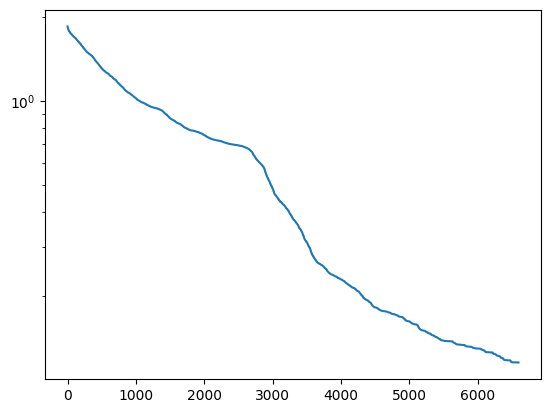

In [35]:
plt.plot(losses)
plt.yscale('log')